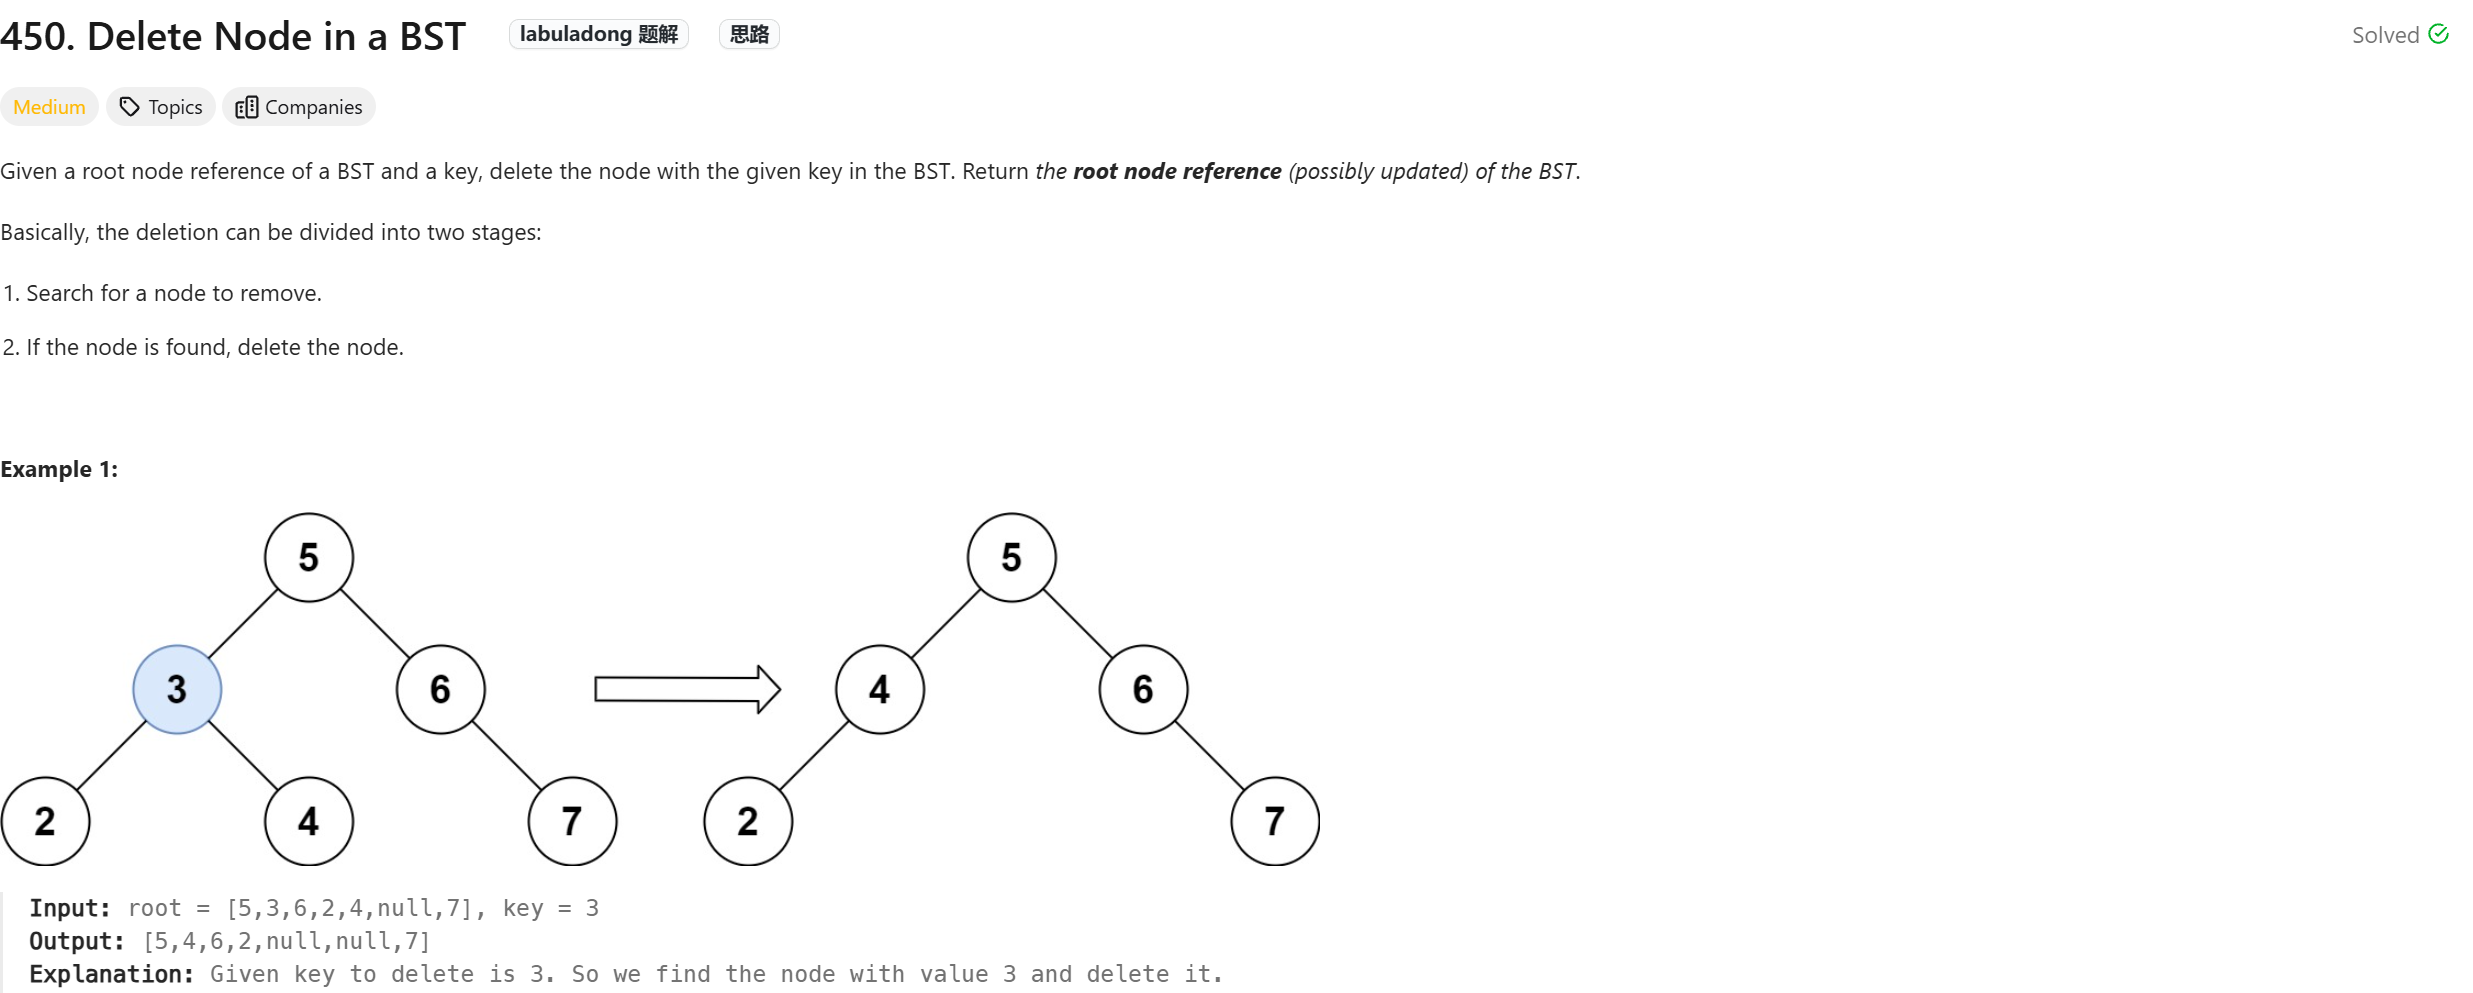

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def deleteNode(self, root: Optional[TreeNode], key: int) -> Optional[TreeNode]:
        
        #Base Case: 如果root是空的话，return None
        #Handle cases:
        #1. 一开始输入的root就是None
        #2. 碰到leaf node了，触底，leaf node的children是None，return
        if root is None:
            return None

        #1. If we find the key > root.val, search rightTree
        if key > root.val:
            root.right = self.deleteNode(root.right, key)
        #2. If we find the key < root.val, search leftTree
        elif key < root.val:
            root.left = self.deleteNode(root.left, key)
        #3. If we find the match, we need to delete the key
        elif root.val == key:
            #3.1 No Children, return None, it is directly removed
            if root.left is None and root.right is None:
                return None
            #3.2 Left is None, but has Right Child, return its right child
            elif root.left is None:
                return root.right
            #3.3 Right is None, but has Left Child, return its left child
            elif root.right is None:
                return root.left
            #3.4 Has two child, we need to replace the node with leftmost val in right subtree
            #or the rightmost val in left subtree to keep balance
            #here we always replace with the rightmost val of left subtree
            else:
                #Initialize the pointer to left subtree
                p = root.left
                #Recrusively look up for right child
                while p.right is not None:
                    p = p.right
                #Assign the rightmost val to root
                root.val = p.val
                #Delete the rightmost val in leftsubtree
                #the rightmost val of the leftsubtree will always be a leaf node, which will hit
                #base case with our method
                root.left = self.deleteNode(root.left, p.val)
        return root
